In [1]:
#source EPOTFenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory for VNA_Analysis)
#EPOTFenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

#import all the libraries needed
from import_dep import *

# import my functions stored in the file 'functions' which can then be called with functions.function_name()
import functions

# Define the path to the output directory where data is saved
path_out =  ('/Users/horatiocox/Desktop/RUG Postdoc/Experiments/Electrical/VDP_JT029_SrRuO3/Output/')
# Define the path to the directories containing the experimental data
directory_1 = Path('/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/Data/')

material_title = '$SrRuO_3$' # Material to be added to plot titles
plot_data = False # set to True to plot the data
plot_string = 'JT029_SrRuO3_LowT' # string to be used at the start of the figure file name
fig_format = 'png' # format of the figure to be saved
plot_transparency = True # set to True to make the data points transparent


## Import Measurement Data 

In [2]:
#'JT029_SrRuO3_171024_Combined_fullrange.txt'
#'JT029_SrRuO3_191024_Combined4'
#'testhc003_2'
data_import_np, data_import_df = functions.import_ppms_data(directory_1.joinpath('JT029_SrRuO3_191024_Combined4'))
print('np shape:', data_import_np.shape)
print(data_import_df.head(6))
# Note that field has been converted to Tesla

np shape: (8712, 5, 6)
   Temp (K)  Field (T)  Source (A)  Source (V)  Sense (V)  index
0    4.9992   0.000049    -0.00001    -0.01207   0.000012      0
1    4.9992   0.000049    -0.00001    -0.01207   0.000132      1
2    4.9992   0.000049    -0.00001    -0.01207  -0.000666      2
3    4.9992   0.000049    -0.00001    -0.01207  -0.000670      3
4    4.9992   0.000049    -0.00001    -0.01207  -0.000539      4
5    4.9992   0.000049    -0.00001    -0.01207  -0.000796      5


## Extract and Check Temperature, Field, and Current values

In [3]:
# Extract the current, temperature and field values from the data as lists along with the number of values used for each
# if re-ordering is true then we reassign data_np to order the fields from -Bmax to Bmax
# Reduced_data = [1,-5] means that the first and last 5 temperature points are removed from the data
[ctf, tf_av, data_np, data_df] = functions.extract_ctf(data_import_np, reorder = True, Reduced_data = [0,-3])

print('np shape:', data_np.shape)
# Check you have the expected and correct Temperature, Field and Current values!
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]
print(ctf[3],'Currents (uA):',ctf[0]/1e-6)  
print(ctf[4],'Temperatures (K):',ctf[1])
print(ctf[5],'Fields (kOe):',np.round(ctf[2]*10,decimals=0))
print('Is this correct?')

print(data_df.head())




np shape: (8118, 5, 6)
11 Currents (uA): [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
41 Temperatures (K): [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135. 140.
 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.]
18 Fields (kOe): [-80. -70. -60. -50. -40. -30. -20. -10.  -0.   0.  10.  20.  30.  40.
  50.  60.  70.  80.]
Is this correct?
   Temp (K)  Field (T)  Source (A)  Source (V)  Sense (V)
0    5.0004  -7.999952   -0.000010    -0.01154  -0.000659
1    5.0004  -7.999952   -0.000008    -0.00922  -0.000527
2    5.0004  -7.999952   -0.000006    -0.00691  -0.000395
3    5.0004  -7.999952   -0.000004    -0.00461  -0.000264
4    5.0004  -7.999952   -0.000002    -0.00230  -0.000133


## Calculate Van der Pauw Resistivity 

In [4]:
film_thickness = 14e-9 # Film thickness in meters

[res_data, res_data_df, R_squared_res] = functions.vdp_resistivity(data_np, film_thickness, ctf, tf_av)

print(res_data_df.head(10))

   Temp (K)  Field (T)  rho_xx_A (ohm.m)  rho_xx_B(ohm.m)  \
0    5.0004  -7.999952          0.000004         0.000004   
1    5.0004  -7.000019          0.000004         0.000004   
2    5.0015  -6.000021          0.000004         0.000004   
3    5.0015  -5.000040          0.000004         0.000004   
4    4.9992  -4.000037          0.000004         0.000004   
5    4.9992  -3.000052          0.000004         0.000004   
6    5.0004  -2.000051          0.000004         0.000004   
7    4.9992  -1.000022          0.000004         0.000004   
8    5.0004  -0.000026          0.000004         0.000004   
9    4.9992   0.000049          0.000004         0.000004   

   rho_xx_average(ohm.m)  
0               0.000004  
1               0.000004  
2               0.000004  
3               0.000004  
4               0.000004  
5               0.000004  
6               0.000004  
7               0.000004  
8               0.000004  
9               0.000004  


## Plot IV data to Check Linearity

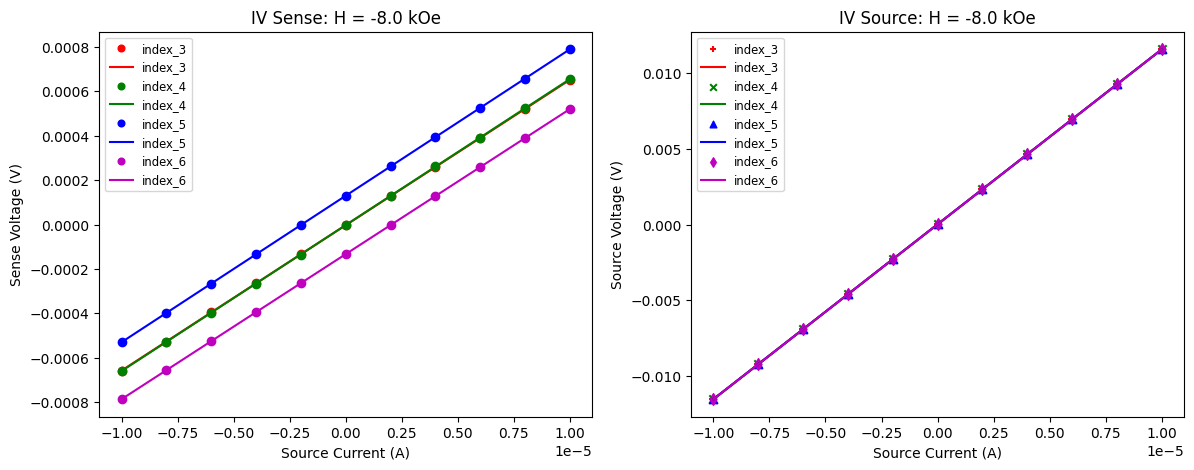

In [5]:
fig0 = plt.figure(figsize=(14, 5))
gs = fig0.add_gridspec(1, 2)
ax = fig0.add_subplot(gs[0, 0])
ax1 = fig0.add_subplot(gs[0, 1])

labels = ['index_3', 'index_4', 'index_5', 'index_6']

## If you get a problem with regression, uncomment the below code to plot V vs I and check the linearity of the fit manually
colors = ['r', 'g', 'b', 'm']
for i in range(4):
    R_test = linregress(data_np[0:ctf[3]-1, 2, 2], data_np[0:ctf[3]-1, 4, 2+i])
    ax.plot(data_np[0:ctf[3], 2, 2], data_np[0:ctf[3], 4, 2+i], 'o', label=f'{labels[i]}', color=colors[i])
    ax.plot(data_np[0:ctf[3], 2, 2], R_test.intercept + R_test.slope * data_np[0:ctf[3], 2, 2], color=colors[i], label=f'{labels[i]}')
ax.legend(loc='best', fontsize='small', markerscale=0.8)

# Set labels and title
ax.set_xlabel('Source Current (A)')
ax.set_ylabel('Sense Voltage (V)')
ax.set_title(f'IV Sense: H = {np.round(data_np[0, 1, 2],decimals=0)} kOe')


## If you get a problem with regression, uncomment the below code to plot V vs I and check the linearity of the fit manually
colors = ['r', 'g', 'b', 'm']
markers = ['+', 'x', '^', 'd']
for i in range(4):
    R_test_2 = linregress(data_np[0:ctf[3]-1, 2, 2], data_np[0:ctf[3]-1, 3, 2+i])
    ax1.scatter(data_np[0:ctf[3], 2, 2], data_np[0:ctf[3], 3, 2+i], label=f'{labels[i]}', color=colors[i], marker=markers[i])
    ax1.plot(data_np[0:ctf[3], 2, 2], R_test_2.intercept + R_test_2.slope * data_np[0:ctf[3], 2, 2], color=colors[i], label=f'{labels[i]}')
ax1.legend(loc='best', fontsize='small', markerscale=0.8)

# Set labels and title
ax1.set_xlabel('Source Current (A)')
ax1.set_ylabel('Source Voltage (V)')
ax1.set_title(f'IV Source: H = {np.round(data_np[0, 1, 2],decimals=0)} kOe')


plt.show()

if plot_data == True:
    fig0.savefig(Path(path_out).joinpath(f'{plot_string}_IV_resistivity.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## R-squared Analysis to Check Linearity of I-V data

average R-squared = 0.9999998005926954


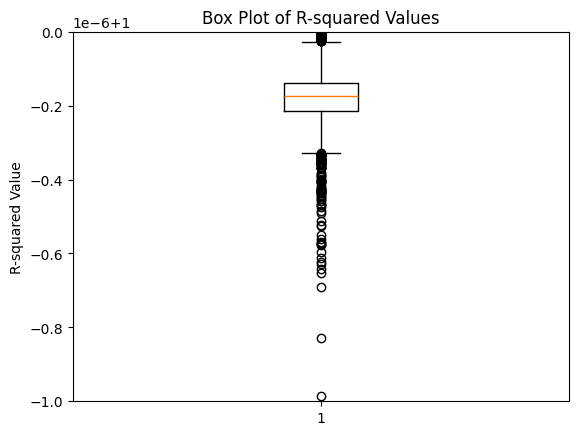

In [6]:
print('average R-squared =',sum(R_squared_res)/len(R_squared_res))

# Plot R-square values in a boxplot
# Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.boxplot(R_squared_res)
ax.set_title('Box Plot of R-squared Values')
ax.set_ylabel('R-squared Value')
ax.set_ylim(1-1e-6, 1)  # If needed, you can set x-axis limits too
plt.show()



## Resistivity Configuration Compararison 
Comparing the resistivity in configuration A and B which are inverted versions of one another (e.g. source meter and sense meter swapped positions)
This is a good check for any systematic errors

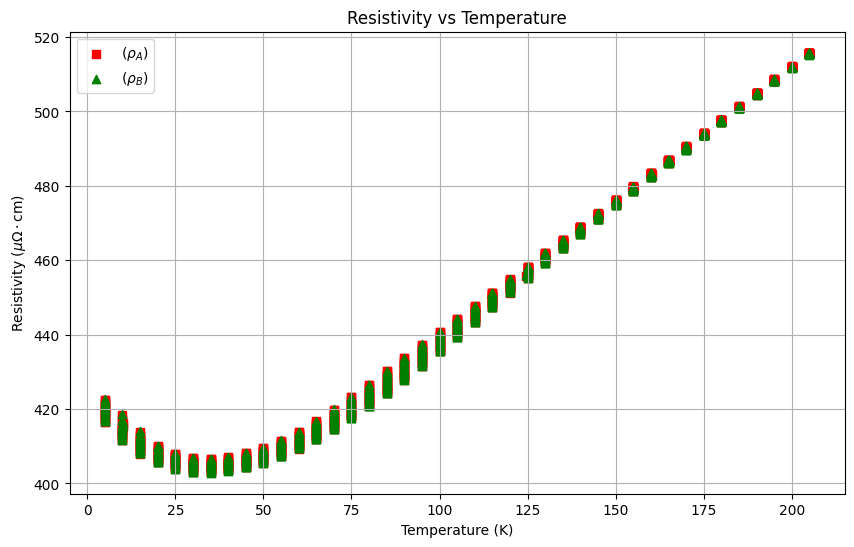

In [7]:
# Create a figure and axis
fig2 = plt.figure(figsize=(10, 6))
ax = fig2.add_subplot(111)  # Create a single subplot


# Plot R_sheet_A vs Temp
ax.scatter(res_data[:,0], res_data[:,2]* 1e8 , marker='s', color='r', label = r'($\rho_A$)')

# Plot R_sheet_B vs Temp
ax.scatter(res_data[:,0], res_data[:,3]* 1e8 , marker='^', color='g', label = r'($\rho_B$)')


# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
ax.set_title('Resistivity vs Temperature')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

if plot_data == True:
    fig2.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_A_vs_B.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Resistivity vs Temperature

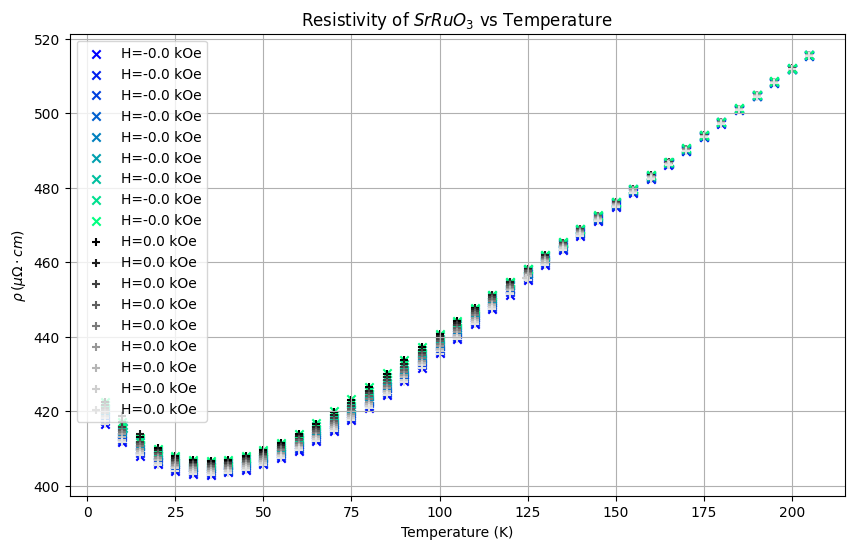

In [8]:
# Create a figure and axis
fig3 = plt.figure(figsize=(10, 6))
ax = fig3.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('winter')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('Greys_r')(np.linspace(0, 0.8, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)


for k in range(ctf[5]):
    # Plot rho_film vs Temp
    ax.scatter(res_data[k::ctf[5],0], res_data[k::ctf[5],4] * 1e8, marker=markers[k], color=c_val[k], label = f'H={np.round(res_data[k,1]/1000,decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho\,(\mu \Omega \cdot cm)$')
ax.set_title(f'Resistivity of {material_title} vs Temperature')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# ax.set_xlim(200, 250)
# ax.set_ylim(0, 10)

# Show the plot
plt.show()

if plot_data == True:
    fig3.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)  


- Anderson localisation causes the metal insulator transition at low T
- If you have defects in film, they can have an external effect of localising charge carriers and reducing the conductivity
    - Also causes loss of metalicity beneath a certain thicknes of LSMO etc
    -  Defects localise the previously delocalised charge carriers, either due to thickness reudction or low T
    - Low thicknes its because number of defects is constant - > higher defect density
    

## Magnetoresistance vs H
- Plotting the magnetoresistance vs the Applied field strength (H) for several temperatures

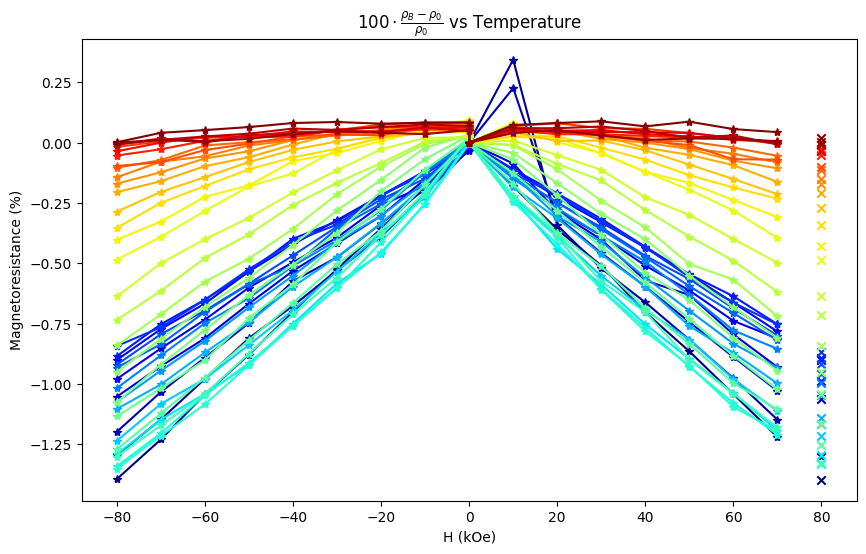

In [9]:

# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
mag_res = functions.magnetoresistance(data_np, film_thickness, ctf, tf_av)

fig4 = plt.figure(figsize=(10, 6))
ax = fig4.add_subplot(111)  # Create a single subplot

# Create a color map for the tempearature points
c_val = plt.cm.jet(np.linspace(0,1,ctf[4]))
# Create a marker array for the temperature points
markers = markers = ['+','.','*', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', 'h', 'H', 'x', 'D', 'd', '|', '_']


for t_count, t in enumerate(ctf[1], start=0):  
    if t>1:
        # Add a plot of magnetoresistance vs field strength for each loop of temperature (excluding last field point which is repeat of B=0)
        ax.plot(ctf[2][:-1]*10, mag_res[t_count,:-1,2], marker='*', color=c_val[t_count], label = f'T={t} K')
        #plot repeat point of B=0 with an x marker to show the difference between two B=0 points
        ax.scatter(ctf[2][-1]*10, mag_res[t_count,-1,2], marker='x', color=c_val[t_count])
        

ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'Magnetoresistance (%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
#ax.legend()
plt.show()

if plot_data == True:
    fig4.savefig(Path(path_out).joinpath(f'{plot_string}_magnetoresistance_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Magnetoresistance Vs T
- Now looking at how the Magnetoresitance at a set field strength varies over temperature
- Displaying this for VDP configuration A, VDP configuration B and the average of the two

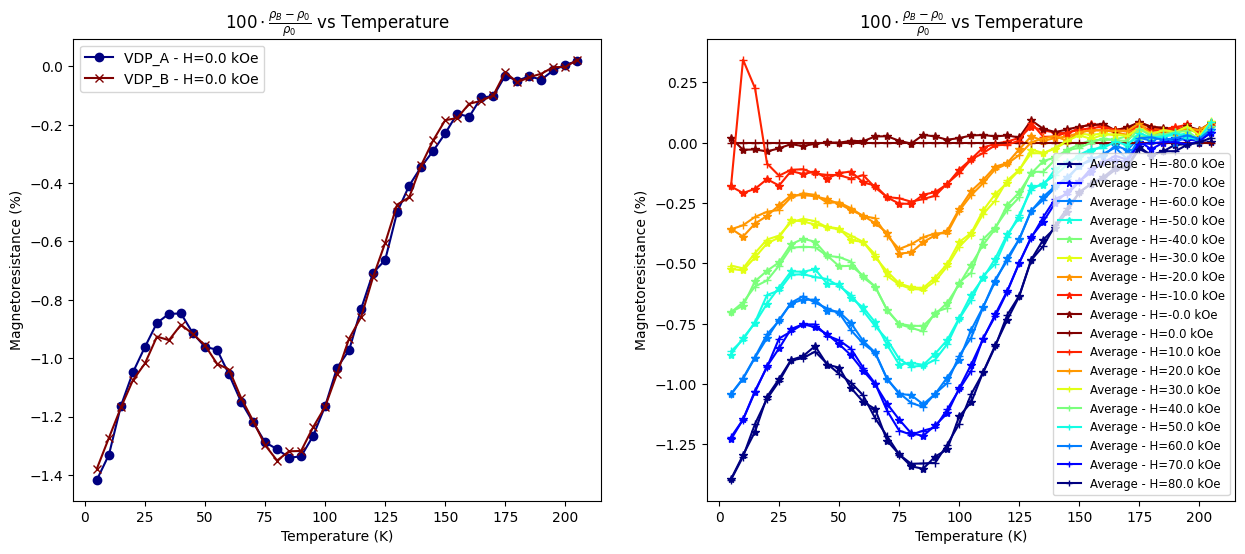

In [10]:
# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
mag_res = functions.magnetoresistance(data_np, film_thickness, ctf, tf_av)

fig5 = plt.figure(figsize=(15, 6))
ax = fig5.add_subplot(121)  # Create two subplot
ax2 = fig5.add_subplot(122)  


# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('jet')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('jet_r')(np.linspace(0, 1, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['*'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)

# Find the index of the maximum positive field strength
f_index = int(ctf[5])-1#int(ctf[5]/2 - 1)

# Sub_plot 1: Comparing configurations A and B
ax.plot(ctf[1], mag_res[:,f_index,0], marker='o', color=c_val[0], label = f'VDP_A - H={np.round(ctf[2][f_index]/1000,0)} kOe')
ax.plot(ctf[1], mag_res[:,f_index,1], marker='x', color=c_val[int(len(c_val)/2)], label = f'VDP_B - H={np.round(ctf[2][f_index]/1000,0)} kOe')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Magnetoresistance (%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax.legend()

# Sub_plot 2: Comparing the average magnetoresistance vs T for various field strengths 

for H_count, H in enumerate(ctf[2], start=0):
    ax2.plot(ctf[1], mag_res[:,H_count,2], marker=markers[H_count], color=c_val[H_count], label = f'Average - H={np.round(ctf[2][H_count]*10,0)} kOe')     

ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'Magnetoresistance (%)')
ax2.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
# Add a legend outside the plot
ax2.legend(loc='lower right', fontsize='small', markerscale=0.8)

# Adjust the plot to make room for the legend
#plt.tight_layout(rect=[0, 0, 0.75, 1])



plt.show()

if plot_data == True:
    fig5.savefig(Path(path_out).joinpath(f'{plot_string}_magnetoresistance_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Arhenius Plot

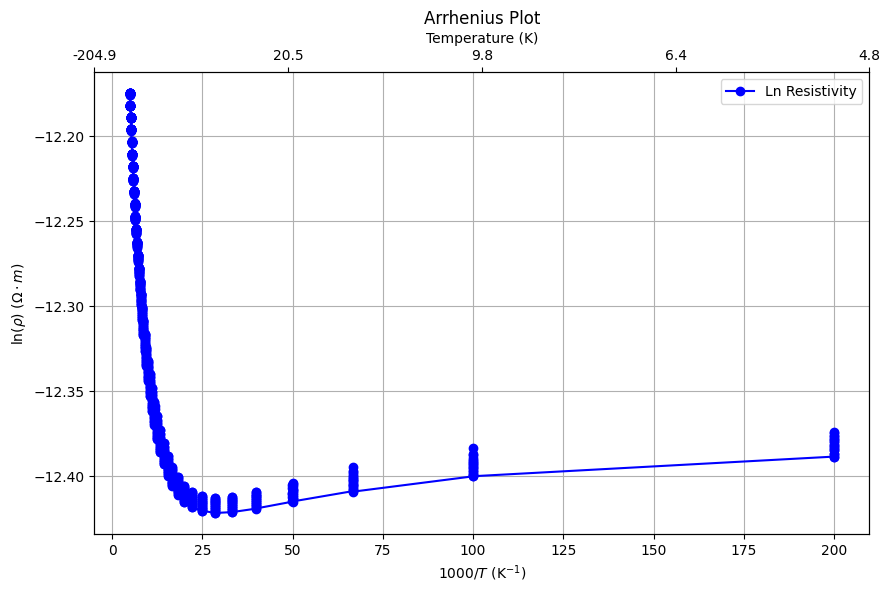

In [11]:
# Create a figure and axis
fig6 = plt.figure(figsize=(10, 6))
ax = fig6.add_subplot(111)  # Create a single subplot

# Plot rho_film vs 1000/Temp
ax.plot(1000 / res_data[:,0], np.log(res_data[:,4]), marker='o', linestyle='-', color='b', label='Ln Resistivity')

# Set labels and title
ax.set_xlabel(r'$1000/T$ (K$^{-1}$)')
ax.set_ylabel(r'$\ln(\rho)$ ($\Omega \cdot m$)')
ax.set_title('Arrhenius Plot')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Create a secondary x-axis at the top
ax2 = ax.twiny()

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
new_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f'{1000/tick:.1f}' for tick in new_ticks])
ax2.set_xlabel('Temperature (K)')

# Show the plot
plt.show()

if plot_data == True:
    fig6.savefig(Path(path_out).joinpath(f'{plot_string}_Arrhenius Plot.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Calculate the Hall Resistivity ($\rho_{xy}$)
- This is: $\frac{V_{measured-perpendicular}}{I_{source}}*t$


In [12]:
film_thickness = 14e-9 # Film thickness in meters

[hall_data, hall_data_df, hall_coefficient, hall_coefficient_df] = functions.vdp_hall(data_np, film_thickness, ctf, tf_av)
print(hall_data_df.head(30))

    Temp (K)  Field (T)  rho_xy_A(ohm.m)  R_squared(I)_A  rho_xy_B(ohm.m)  \
0     5.0004  -7.999952     1.297322e-08        0.999922     1.297322e-08   
1     5.0004  -7.000019     1.300133e-08        0.999926     1.300133e-08   
2     5.0015  -6.000021     1.305447e-08        0.999812     1.305447e-08   
3     5.0015  -5.000040     1.277311e-08        0.999925     1.277311e-08   
4     4.9992  -4.000037     1.250037e-08        0.999779     1.250037e-08   
5     4.9992  -3.000052     1.208994e-08        0.999922     1.208994e-08   
6     5.0004  -2.000051     1.143979e-08        0.999845     1.143979e-08   
7     4.9992  -1.000022     9.942265e-09        0.999763     9.942265e-09   
8     5.0004  -0.000026     7.483430e-09        0.999574     7.483430e-09   
9     4.9992   0.000049    -2.128046e-08       -0.999557    -2.128046e-08   
10    5.0015   0.999946    -2.406808e-08       -0.999964    -2.406808e-08   
11    5.0003   1.999948    -2.543203e-08       -0.999967    -2.543203e-08   

## R-squared Analysis to Check Linearity of Resistivity I-V data

average R-squared_A = 0.9931296545093888
average R-squared_B = 0.9931296545093888


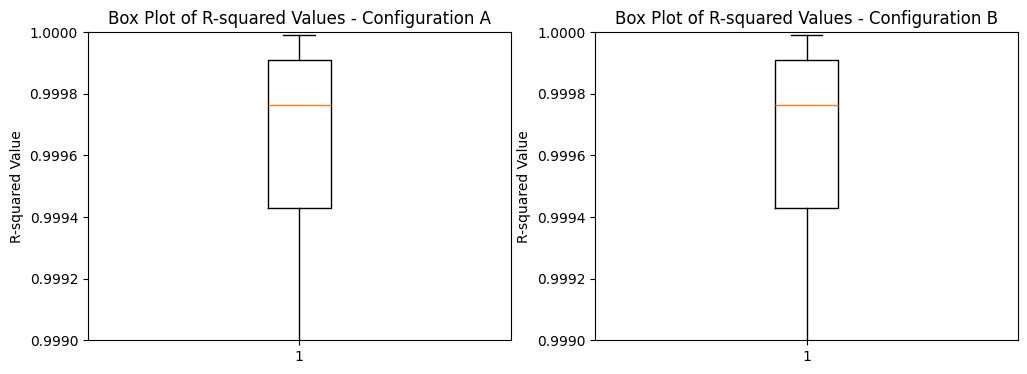

In [13]:
print('average R-squared_A =',np.mean(np.abs(hall_data[:,3])))
print('average R-squared_B =',np.mean(np.abs(hall_data[:,5])))

# Plot R-square values in a boxplot
# Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
fig7 = plt.figure(figsize=(12, 4))
ax = fig7.add_subplot(121)
ax.boxplot(np.abs(hall_data[:,3]))
ax.set_title('Box Plot of R-squared Values - Configuration A')
ax.set_ylabel('R-squared Value')
ax.set_ylim(1-1e-3, 1)  # If needed, you can set x-axis limits too

ax2 = fig7.add_subplot(122)
ax2.boxplot(np.abs(hall_data[:,5]))
ax2.set_title('Box Plot of R-squared Values - Configuration B')
ax2.set_ylabel('R-squared Value')
ax2.set_ylim(1-1e-3, 1)  # If needed, you can set x-axis limits too
plt.show()


### If you get a problem with regression, uncomment the below code to plot V vs I and check the linearity of the fit manually
# R_test = linregress(data_np[0:ctf[3]-1, 2, 2], data_np[0:ctf[3]-1, 4, 2])   
# plt.plot(data_np[0:ctf[3], 2, 2], data_np[0:ctf[3], 4, 2], 'o', label='original data')
# plt.plot(data_np[0:ctf[3], 2, 2], R_test.intercept + R_test.slope * data_np[0:ctf[3], 2, 2], 'r', label='fitted line')
# plt.legend()
# plt.show()

if plot_data == True:
    fig7.savefig(Path(path_out).joinpath(f'{plot_string}_R_squared_hall_res.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall resisitivity vs Temperature

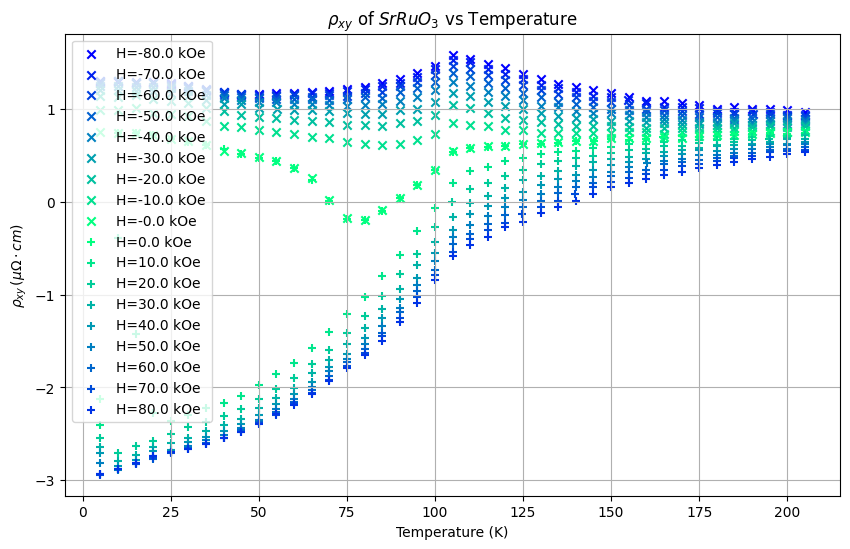

In [14]:
# Create a figure and axis
fig8 = plt.figure(figsize=(10, 6))
ax = fig8.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('winter')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('winter_r')(np.linspace(0, 0.8, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)


for k in range(ctf[5]):
    # Plot rho_film vs Temp
    ax.scatter(hall_data[k::ctf[5],0], hall_data[k::ctf[5],6]*1e8 , marker=markers[k], color=c_val[k], label = f'H={np.round(hall_data[k,1]*10,decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' of {material_title} vs Temperature')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

if plot_data == True:
    fig8.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xy_vs_T.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

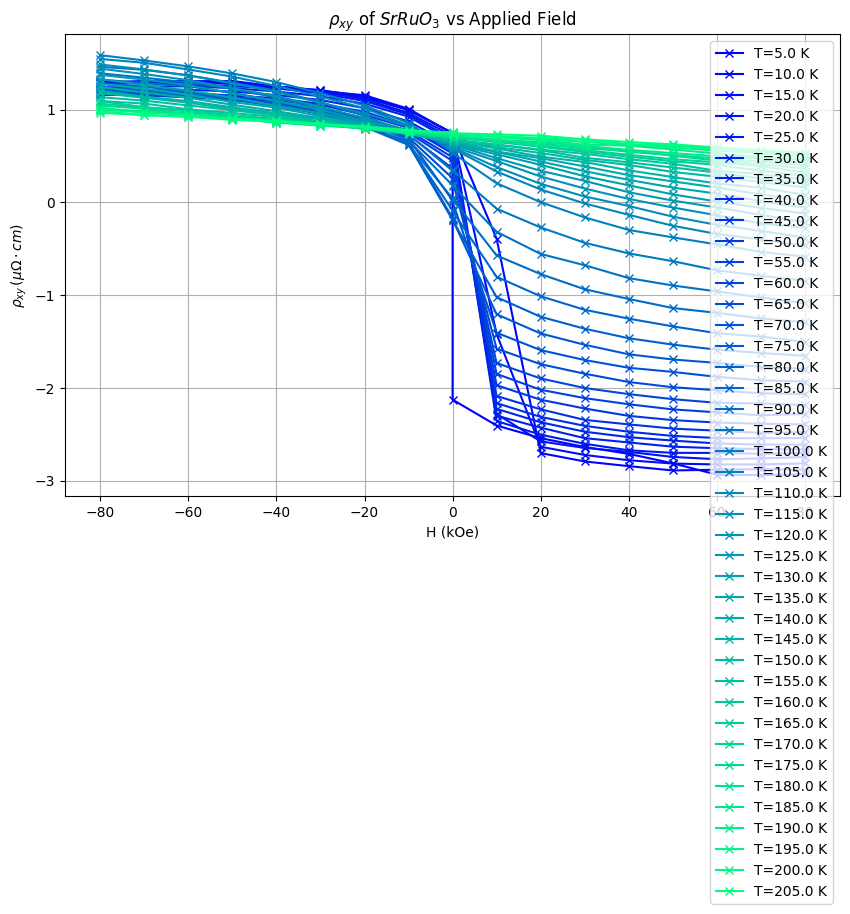

In [15]:
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

# Create a figure and axis
fig9 = plt.figure(figsize=(10, 6))
ax = fig9.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
c_val = plt.get_cmap('winter')(np.linspace(0, 1, ctf[4]))


# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * ctf[4]


for t_count, t in enumerate(ctf[1], start=0):
    if t > 1:
        index = t_count * ctf[5]
        # Plot rho_film vs Temp
        ax.plot(hall_data[index:index+ctf[5],1]*10, hall_data[index:index+ctf[5],6]*1e8, marker=markers[t_count], color=c_val[t_count], label = f'T={np.round(t,decimals=0)} K')
# Set labels and title
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' of {material_title} vs Applied Field')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

if plot_data == True:
    fig9.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xy_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall Coeff Vs T?

In [16]:
print(hall_coefficient_df.head(10))

   Temp (K)      Hallco_A  R^2(H)_A      Hallco_B  R^2(H)_B  Hallco_average
0    4.9992 -3.617834e-09 -0.890613 -3.617834e-09 -0.890613   -3.617834e-09
1   10.0008 -3.584936e-09 -0.895968 -3.584936e-09 -0.895968   -3.584936e-09
2   15.0012 -3.546635e-09 -0.896161 -3.546635e-09 -0.896161   -3.546635e-09
3   19.9984 -3.503668e-09 -0.887805 -3.503668e-09 -0.887805   -3.503668e-09
4   25.0002 -3.451502e-09 -0.887252 -3.451502e-09 -0.887252   -3.451502e-09
5   29.9994 -3.376289e-09 -0.889071 -3.376289e-09 -0.889071   -3.376289e-09
6   34.9992 -3.294219e-09 -0.891427 -3.294219e-09 -0.891427   -3.294219e-09
7   40.0018 -3.208544e-09 -0.893445 -3.208544e-09 -0.893445   -3.208544e-09
8   44.9991 -3.128177e-09 -0.895956 -3.128177e-09 -0.895956   -3.128177e-09
9   49.9993 -3.031009e-09 -0.900678 -3.031009e-09 -0.900678   -3.031009e-09


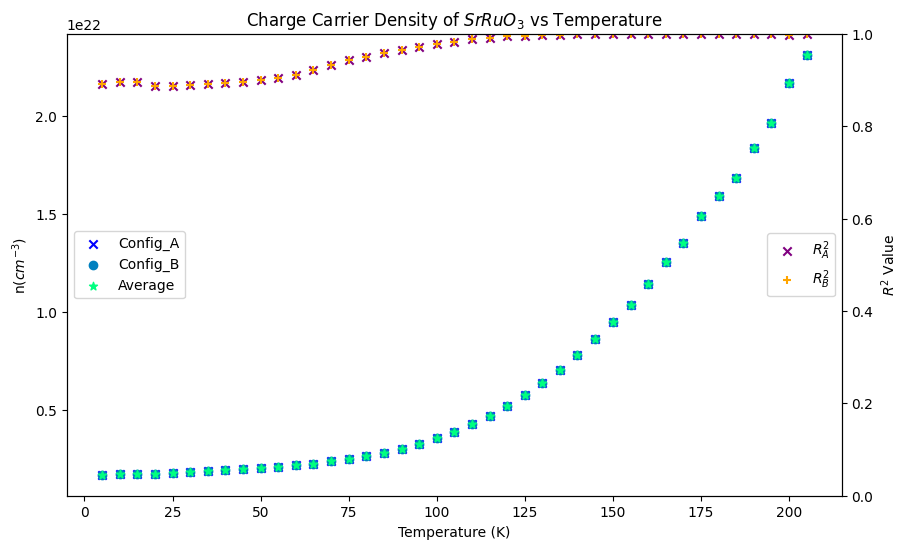

In [ ]:


# Create a figure and axis
fig10 = plt.figure(figsize=(10, 6))
ax = fig10.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, 3))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x','o','*']


ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 1],scipy.constants.e)), marker=markers[0], color=c_val[0], label=f'Config_A')
ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 3],scipy.constants.e)), marker=markers[1], color=c_val[1], label=f'Config_B')
ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 5],scipy.constants.e)), marker=markers[2], color=c_val[2], label=f'Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'n($cm^{-3}$)')
ax.set_title(f'Charge Carrier Density in {material_title} vs Temperature')

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left')

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 2]), color='purple', marker = 'x', label='$R^2_{A}$')
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 4]), color='orange', marker = '+', label='$R^2_{B}$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right')
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig10.savefig(Path(path_out).joinpath(f'{plot_string}_n_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Mobility vs T

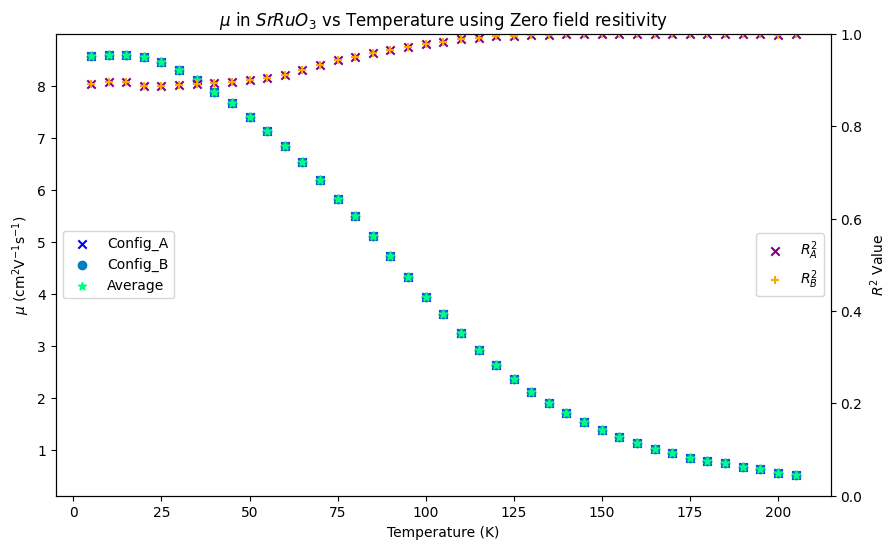

In [22]:


# Create a figure and axis
fig11 = plt.figure(figsize=(10, 6))
ax = fig11.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, 3))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x','o','*']


ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 1],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[0], color=c_val[0], label=f'Config_A')
ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 3],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[1], color=c_val[1], label=f'Config_B')
ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 5],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[2], color=c_val[2], label=f'Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')
ax.set_title(r'$\mu$' f' in {material_title} vs Temperature using Zero field resitivity')

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left')

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 2]), color='purple', marker = 'x', label='$R^2_{A}$')
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 4]), color='orange', marker = '+', label='$R^2_{B}$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right')
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig11.savefig(Path(path_out).joinpath(f'{plot_string}_mobility_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## $\rho_{xy}$ vs $\rho_{xx}$
- Can have problems where with both holes and electrons the carriers can cancel out the measured hall voltage
- Need to check this?

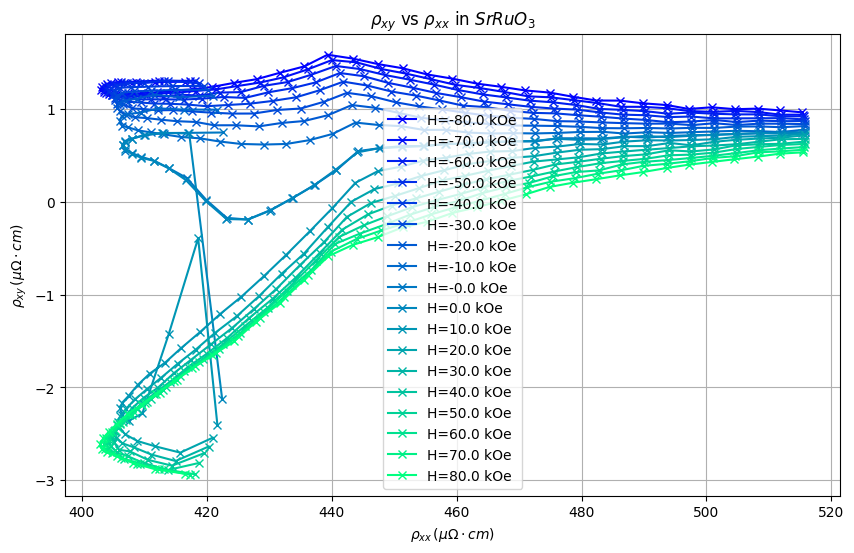

In [ ]:
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

# Create a figure and axis
fig12 = plt.figure(figsize=(10, 6))
ax = fig12.add_subplot(111)  # Create a single subplot


# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, ctf[5]))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * ctf[5]


for H_count, H in enumerate(ctf[2], start=0):
    index = t_count * ctf[5]
    # Plot rho_film vs Temp
    ax.plot(res_data[H_count::ctf[5],4]*1e8, hall_data[H_count::ctf[5],4]*1e8, marker=markers[H_count], color=c_val[H_count], label = f'H={np.round(H*10,decimals=0)} kOe')
            #ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]


ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_xlabel(r'$\rho_{xx}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$ vs $\rho_{xx}$' f' for {material_title}')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

if plot_data == True:
    fig12.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_vs_rho_xy.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

In [20]:
print(res_data_df.head(30))

    Temp (K)  Field (T)  rho_xx_A (ohm.m)  rho_xx_B(ohm.m)  \
0     5.0004  -7.999952          0.000004         0.000004   
1     5.0004  -7.000019          0.000004         0.000004   
2     5.0015  -6.000021          0.000004         0.000004   
3     5.0015  -5.000040          0.000004         0.000004   
4     4.9992  -4.000037          0.000004         0.000004   
5     4.9992  -3.000052          0.000004         0.000004   
6     5.0004  -2.000051          0.000004         0.000004   
7     4.9992  -1.000022          0.000004         0.000004   
8     5.0004  -0.000026          0.000004         0.000004   
9     4.9992   0.000049          0.000004         0.000004   
10    5.0015   0.999946          0.000004         0.000004   
11    5.0003   1.999948          0.000004         0.000004   
12    5.0015   2.999954          0.000004         0.000004   
13    4.9992   3.999971          0.000004         0.000004   
14    5.0015   4.999980          0.000004         0.000004   
15    5.

In [21]:
print(hall_data_df.head(30))

    Temp (K)  Field (T)  rho_xy_A(ohm.m)  R_squared(I)_A  rho_xy_B(ohm.m)  \
0     5.0004  -7.999952     1.297322e-08        0.999922     1.297322e-08   
1     5.0004  -7.000019     1.300133e-08        0.999926     1.300133e-08   
2     5.0015  -6.000021     1.305447e-08        0.999812     1.305447e-08   
3     5.0015  -5.000040     1.277311e-08        0.999925     1.277311e-08   
4     4.9992  -4.000037     1.250037e-08        0.999779     1.250037e-08   
5     4.9992  -3.000052     1.208994e-08        0.999922     1.208994e-08   
6     5.0004  -2.000051     1.143979e-08        0.999845     1.143979e-08   
7     4.9992  -1.000022     9.942265e-09        0.999763     9.942265e-09   
8     5.0004  -0.000026     7.483430e-09        0.999574     7.483430e-09   
9     4.9992   0.000049    -2.128046e-08       -0.999557    -2.128046e-08   
10    5.0015   0.999946    -2.406808e-08       -0.999964    -2.406808e-08   
11    5.0003   1.999948    -2.543203e-08       -0.999967    -2.543203e-08   